# dependencies

In [ ]:
!pip install inverse-canopy

# **Model Inputs**

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-30
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 8.1267591477517502
Step 100: Loss = 0.4907759483429451
Step 200: Loss = 0.3072141174703125
Step 300: Loss = 0.1175691955396992
Step 400: Loss = 0.0064726713721124
No improvement since Step 359, early stopping.
[Best]  Step 358: Loss = 0.0070736698545453
[Final] Step 408: Loss = 0.0065129513651763

predicted end states
-------------------------------------
         5th       Mean      95th
LCDL-1:  1.09e-08  1.10e-08  1.12e-08
LCDL-2:  9.84e-12  9.99e-12  1.01e-11
LCDL-3:  9.84e-12  9.99e-12  1.01e-11
LCDL-4:  9.84e-12  9.99e-12  1.01e-11
LCDL-0:  1.00e+00  1.00e+00  1.00e+00
-------------------------------------
predicted conditional events
-----------------------------------
       5th       Mean      95th
LCDL:  1.09e-08  1.11e-08  1.12e-08
PKRU:  9.03e-04  9.03e-04  9.04e-04
DHRS:  9.04e-04  9.04e-04  9.04e-04
DHRL:  9.05e-04  9

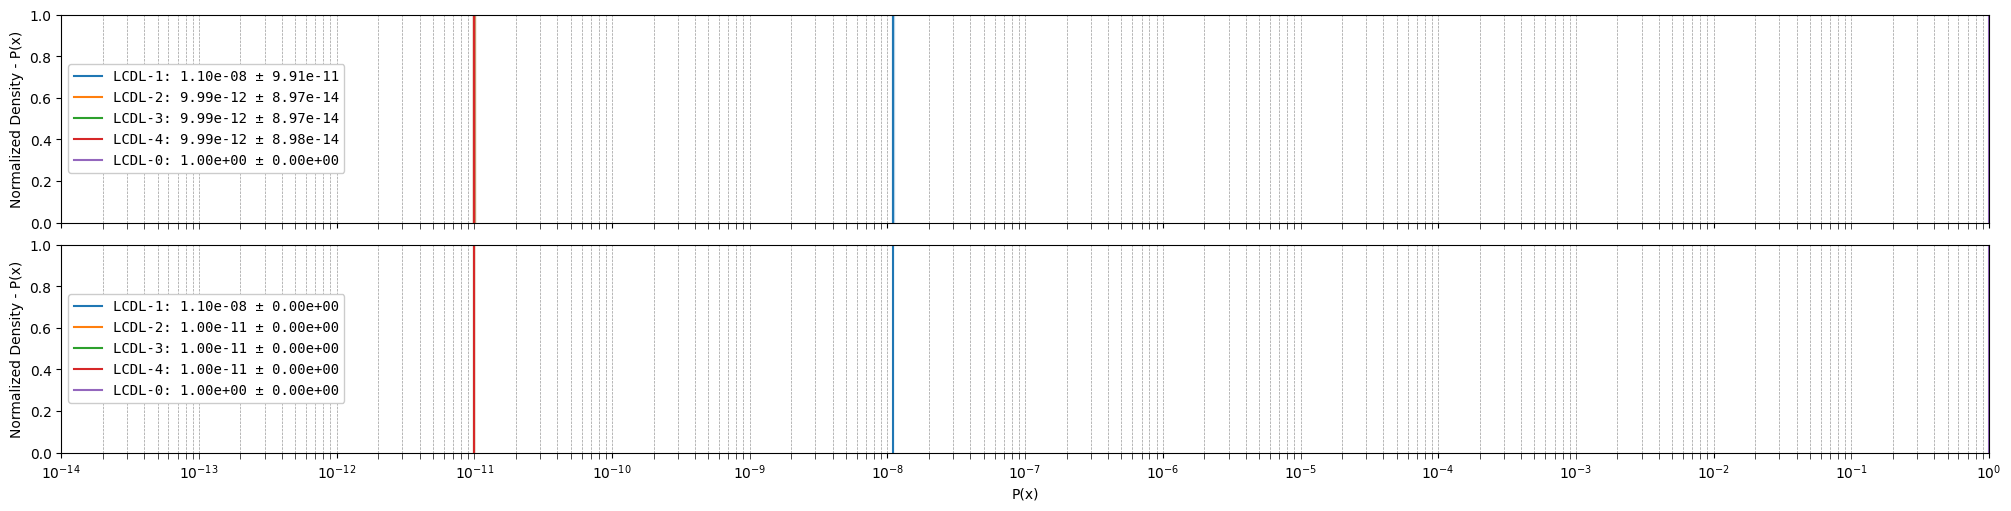

In [4]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable = {
 'num_samples': 10000,    # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-30,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve   
}

conditional_events = {
    'names': ['LCDL', 'PKRU', 'DHRS', 'DHRL'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'LCDL-1': {
        'sequence': [1, 0, 0, 0],
        'probability': 1.1e-8,
    },
    'LCDL-2': {
        'sequence': [1, 0, 0, 1],
        'probability': 1.00e-11,
    },
    'LCDL-3': {
        'sequence': [1, 0, 1, np.nan],
        'probability': 1.00e-11,
    },
    'LCDL-4': {
        'sequence': [1, 1, np.nan, np.nan],
        'probability': 1.00e-11,
    },
    'LCDL-0': {
        'sequence': [0, np.nan, np.nan, np.nan],
        'probability': 1.0 - 1.1e-8 - 1.00e-11 - 1.00e-11 - 1.00e-11, # one minus all the other end-states
    },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-30
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 17.8429693423585043
Step 100: Loss = 3.9290103273116728
Step 200: Loss = 0.0820853139891900
No improvement since Step 241, early stopping.
[Best]  Step 240: Loss = 0.0046576258420071
[Final] Step 290: Loss = 0.0112726303466675

predicted end states
-------------------------------------
         5th       Mean      95th
SDFR-0:  9.96e-01  9.96e-01  9.96e-01
SDFR-1:  4.23e-03  4.23e-03  4.23e-03
SDFR-2:  4.38e-05  4.38e-05  4.38e-05
SDFR-3:  6.24e-09  6.24e-09  6.24e-09
SDFR-4:  2.13e-05  2.13e-05  2.13e-05
SDFR-5:  1.91e-05  1.91e-05  1.91e-05
SDFR-6:  2.09e-06  2.09e-06  2.09e-06
SDFR-7:  1.74e-08  1.74e-08  1.74e-08
SDFR-8:  4.31e-09  4.31e-09  4.31e-09
-------------------------------------
predicted conditional events
-----------------------------------------
             5th       Mean      95th
SDFR      :  4.32e-03  4.32e-03  

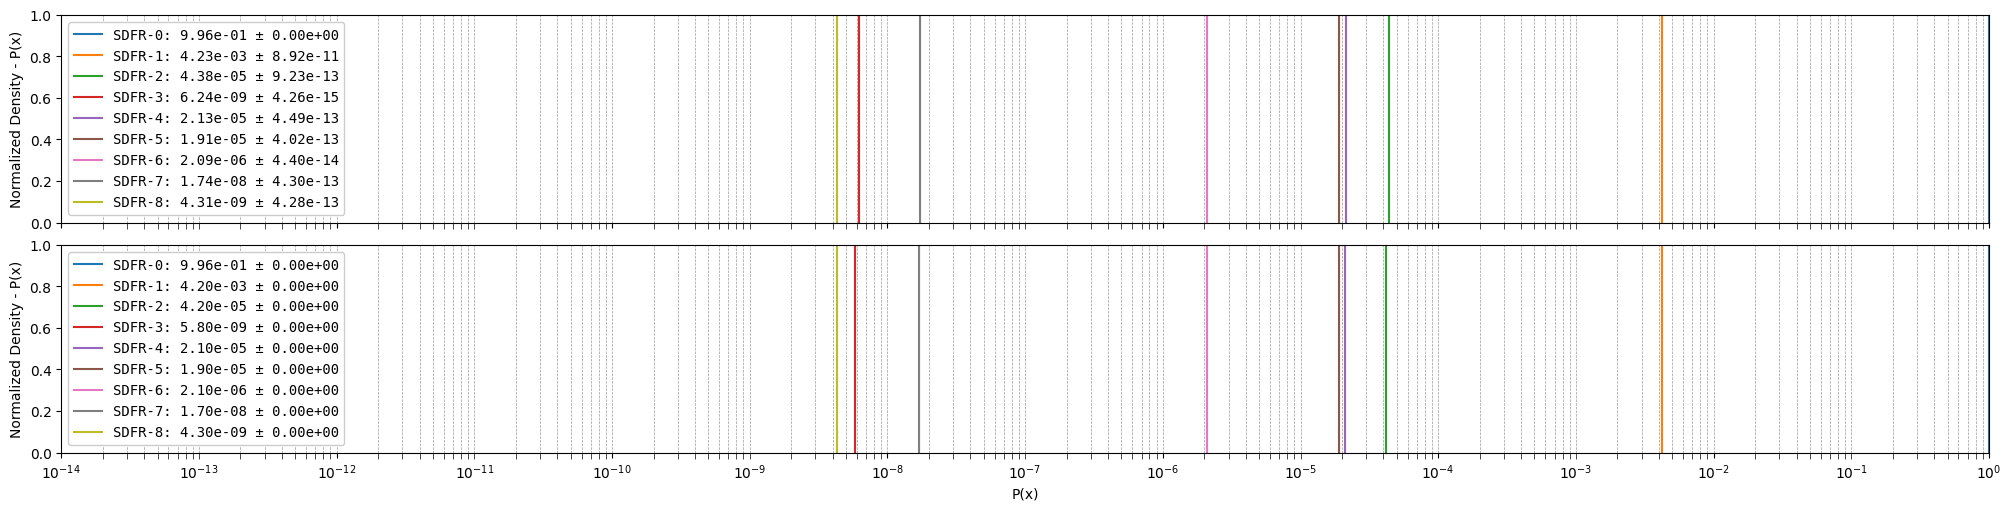

In [5]:
tunable = {
 'num_samples': 1000,     # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-30,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before stopping, if the loss does not improve
}

conditional_events = {
    'names': ['SDFR      ', 'LMFD      ', 'RFIR      ', 'LLRF      ', 'SSSD|~LLRF', 'SSSD|LLRF ', 'SYSO|~LLRF', 'SYSO|LLRF '],  # Assuming names based on the sequences
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'SDFR-0': {
        'sequence': [0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 1 - 4.2e-3 - 4.2e-5 - 5.8e-9 - 2.1e-5 - 1.9e-5 - 2.1e-6 - 1.7e-8 - 4.3e-9,
    },
    'SDFR-1': {
        'sequence': [1, 0, 0, 0, 0, np.nan, np.nan, np.nan],
        'probability': 4.2e-3,
    },
    'SDFR-2': {
        'sequence': [1, 0, 0, 0, 1, np.nan, 0, np.nan]  ,
        'probability': 4.2e-5,
    },
    'SDFR-3': {
        'sequence': [1, 0, 0, 0, 1, np.nan, 1, np.nan],
        'probability': 5.8e-9,
    },
    'SDFR-4': {
        'sequence': [1, 0, 0, 1, np.nan, 0, np.nan, np.nan],
        'probability': 2.1e-5,
    },
    'SDFR-5': {
        'sequence': [1, 0, 0, 1, np.nan, 1, np.nan, 0],
        'probability': 1.9e-5,
    },
    'SDFR-6': {
        'sequence': [1, 0, 0, 1, np.nan, 1, np.nan, 1],
        'probability': 2.1e-6,
    },
    'SDFR-7': {
        'sequence': [1, 0, 1, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 1.7e-8,  
    },
    'SDFR-8': {
        'sequence': [1, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 4.3e-9,  
    },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)